Life cycle of ML Project

- Understanding the Problem Statment
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv('./data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
df.shape

(1000, 8)

Data Checks to perform

- Check data type
- Check Missing values
- Check Duplicates
- Check the number of unique values of each column
- Check statistics of data set
- Check varous categories present in different categorical column

In [18]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [19]:
# check missing values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Noete
- There is no null values
- There is 3 numeric featuers (math score, reading score, writing score)
-  Otherwise all features are categorical

In [20]:
# check duplication
print(df.duplicated().sum())
df.drop_duplicates() # to delete duplication

0


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [21]:
# Check unique values for each featuers or column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [22]:
# BASIC Check statistics of data set
df.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Notes
- All means are very close to each other - between (66.08-68.05)
- All standard deviations are close too - between (14.6-15.19)
- Otherwise min for math score is 0 , for writing score is much higher = 10 and for reading myet higher  = 17

In [23]:
print("Categories in 'gender' featuer:  ",end=" ")
print(df['gender'].nunique(),end="  , ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' featuer:  ",end=" ")
print(df['race/ethnicity'].nunique(),end="  , ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' featuer:  ",end=" ")
print(df['parental level of education'].nunique(),end="  , ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' featuer:  ",end=" ")
print(df['lunch'].nunique(),end="  , ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' featuer:  ",end=" ")
print(df['test preparation course'].nunique(),end="  , ")
print(df['test preparation course'].unique())


Categories in 'gender' featuer:   2  , ['female' 'male']
Categories in 'race/ethnicity' featuer:   5  , ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' featuer:   6  , ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' featuer:   2  , ['standard' 'free/reduced']
Categories in 'test preparation course' featuer:   2  , ['none' 'completed']


In [24]:
# defiene numerical & categorical columns or features
numeric_features = [i for i in df.columns if df[i].dtype !='O']
categorical_features = [i for i in df.columns if df[i].dtype =='O']

# print columns
print('We have {} numerical features: {}'.format(len(numeric_features),numeric_features))
print('We have {} categorical features: {}'.format(len(categorical_features),categorical_features))


We have 3 numerical features: ['math score', 'reading score', 'writing score']
We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


3.8 Adding columns for "Total Score" and "Average"

In [25]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score'] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


#

In [26]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Math: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Math: {reading_full}')

Number of students with full marks in Math: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Math: 17


In [27]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Math: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in REading: {reading_less_20}')

Number of students with less than 20 marks in Math: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in REading: 1


# Notes:
- As we see students preformed well in reading
- The worst in Math

# 4. Exploring Data (Visualization)

4.1 Visualix ava score distribution to make some conclusion

- Histogram
- Kernel Distribution Fun (KDE)

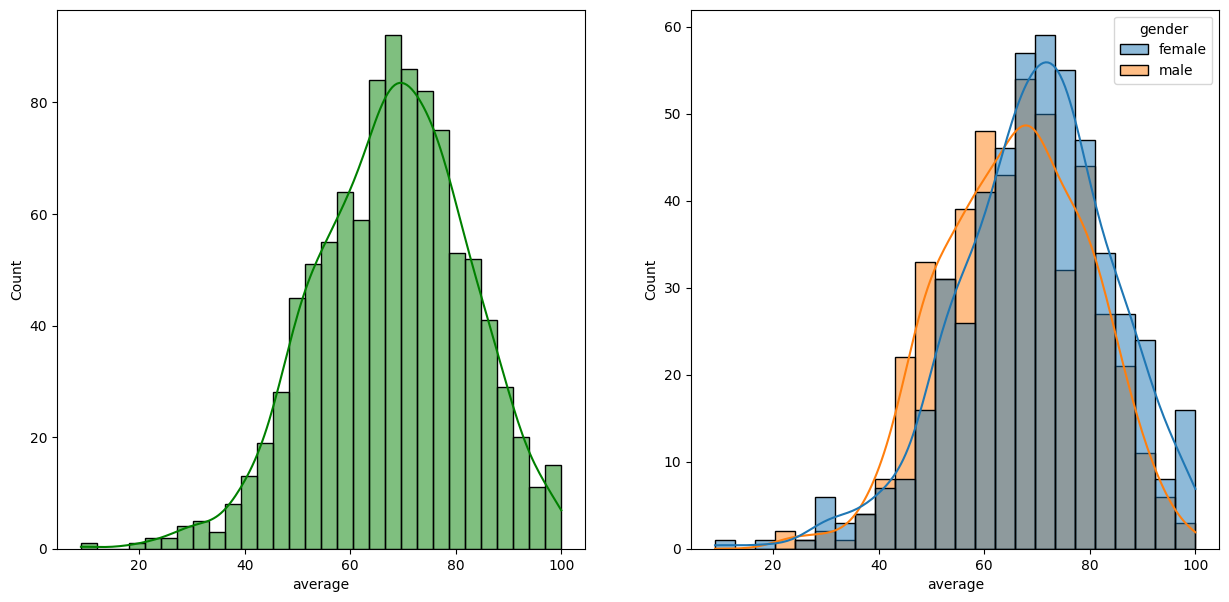

In [15]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data= df,x='average',kde=True,hue='gender')
plt.show()

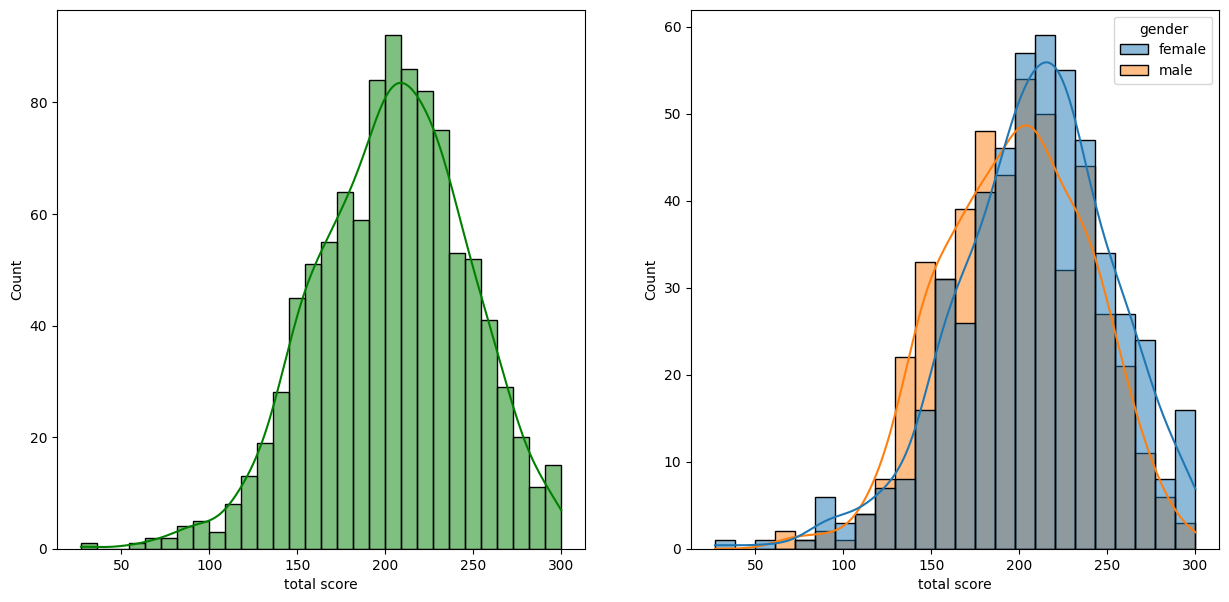

In [16]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data= df,x='total score',kde=True,hue='gender')
plt.show()

In [17]:
print(df[df['gender'] == 'female']['total score'].mean())
print(df[df['gender'] != 'female']['total score'].mean())

208.70849420849422
197.5124481327801


# Notes:
- Female students tend to preform well then male students

In [24]:
df.groupby('gender')['total score'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,208.708494,43.625427,27.0,182.0,211.0,236.00,300.0
male,482.0,197.512448,41.096520,69.0,168.0,199.0,228.75,300.0


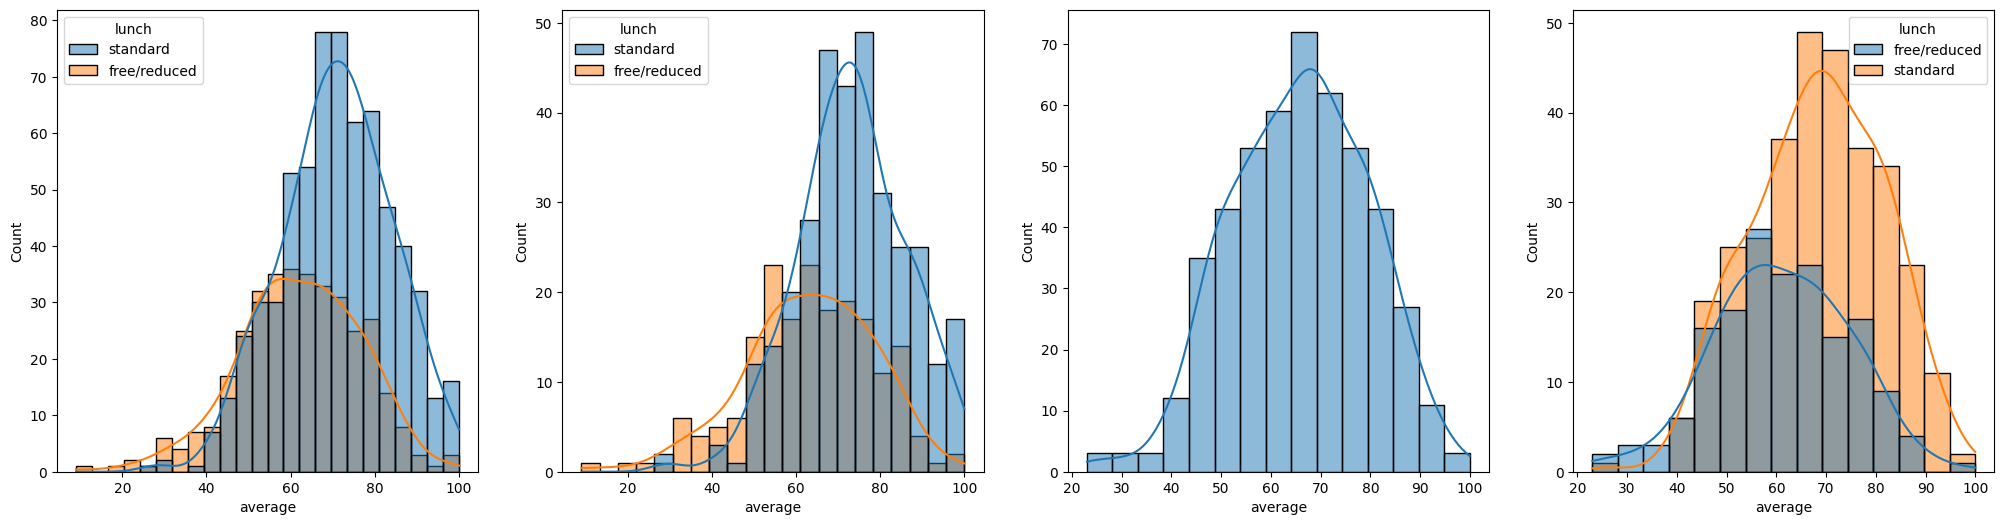

In [28]:
plt.subplots(1,4,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'],x='average',kde=True)
plt.subplot(144)
sns.histplot(data=df[df.gender == 'male'],x='average',kde=True,hue='lunch')
plt.show()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

parental level of education
associate's degree    208.707207
bachelor's degree     215.771186
high school           189.290816
master's degree       220.796610
some college          205.429204
some high school      195.324022
Name: total score, dtype: float64

parental level of education
associate's degree    209.0
bachelor's degree     213.5
high school           195.0
master's degree       220.0
some college          206.0
some high school      200.0
Name: total score, dtype: float64



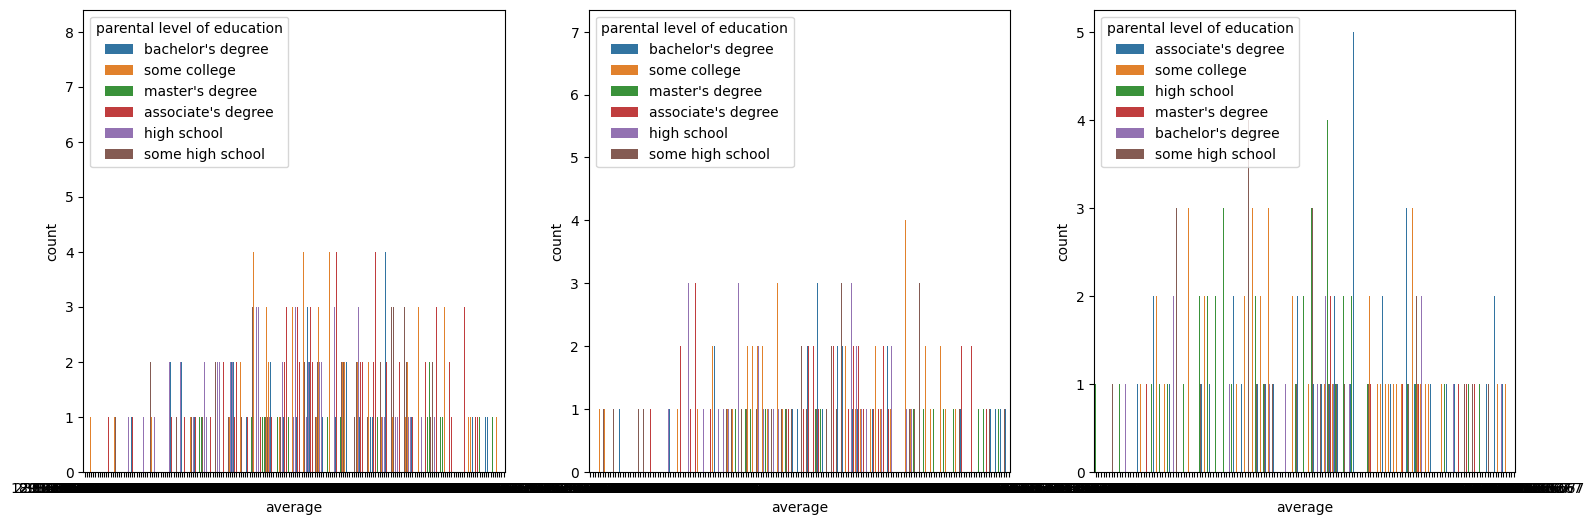

In [36]:
print(df['parental level of education'].value_counts())
# print(df['parental level of education'].nunique())
print()
print(df.groupby('parental level of education')['total score'].mean().transpose())
print()

print(df.groupby('parental level of education')['total score'].median().transpose())
print()

plt.subplots(3,1,figsize=(25,6))
plt.subplot(141)
# sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
sns.countplot(data=df,x='average',hue='parental level of education')
plt.subplot(142)
# sns.histplot(data=df[df.gender == 'female'],x='average',kde=True,hue='parental level of education')
sns.countplot(data=df[df.gender == 'female'],x='average',hue='parental level of education')
plt.subplot(143)
# sns.histplot(data=df[df.gender == 'male'],x='average',kde=True,hue='parental level of education')
sns.countplot(data=df[df.gender == 'male'],x='average',hue='parental level of education')
plt.show()

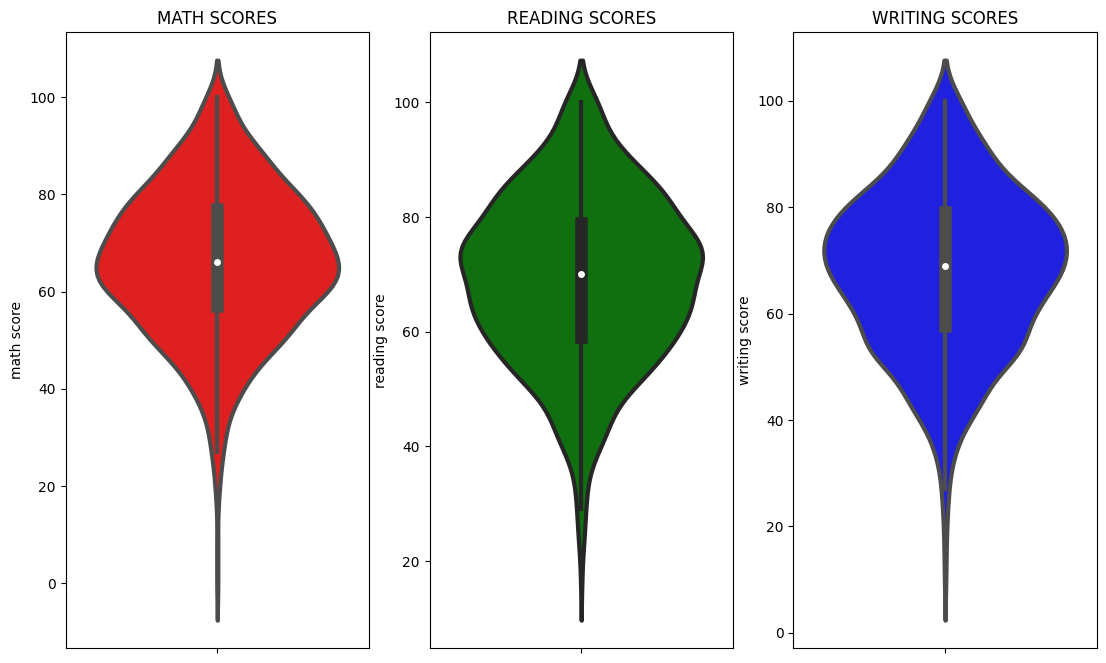

In [43]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

Multivariate analysis using pieplot

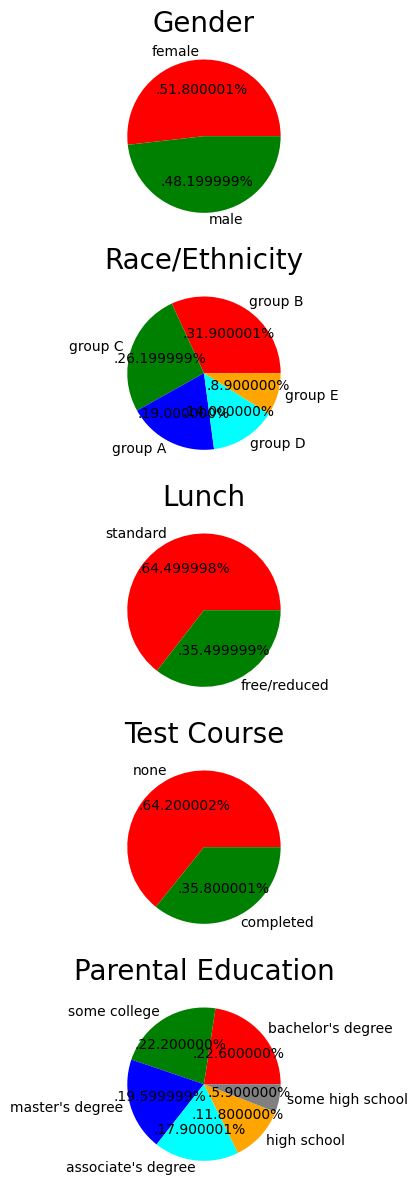

In [59]:
autopct = '.%2f%%'
plt.rcParams['figure.figsize'] = (30,12)



# Gender
plt.subplot(5, 1, 1)
size = df['gender'].value_counts()
labels = tuple(df['gender'].unique())
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct=autopct)
plt.title('Gender', fontsize = 20)
plt.axis('off')



# race/ethnicity
plt.subplot(5, 1, 2)
size = df['race/ethnicity'].value_counts()
labels = tuple(df['race/ethnicity'].unique())
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size,colors=color, labels=labels,autopct=autopct)
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



# lunch
plt.subplot(5, 1, 3)
size = df['lunch'].value_counts()
labels = tuple(df['lunch'].unique())
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = autopct)
plt.title('Lunch', fontsize = 20)
plt.axis('off')



# test preparation course
plt.subplot(5, 1, 4)
size = df['test preparation course'].value_counts()
labels = tuple(df['test preparation course'].unique())
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


# parental level of education
plt.subplot(5, 1, 5)
size = df['parental level of education'].value_counts()
labels = tuple(df['parental level of education'].unique())
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')







plt.tight_layout()
plt.grid()

plt.show()

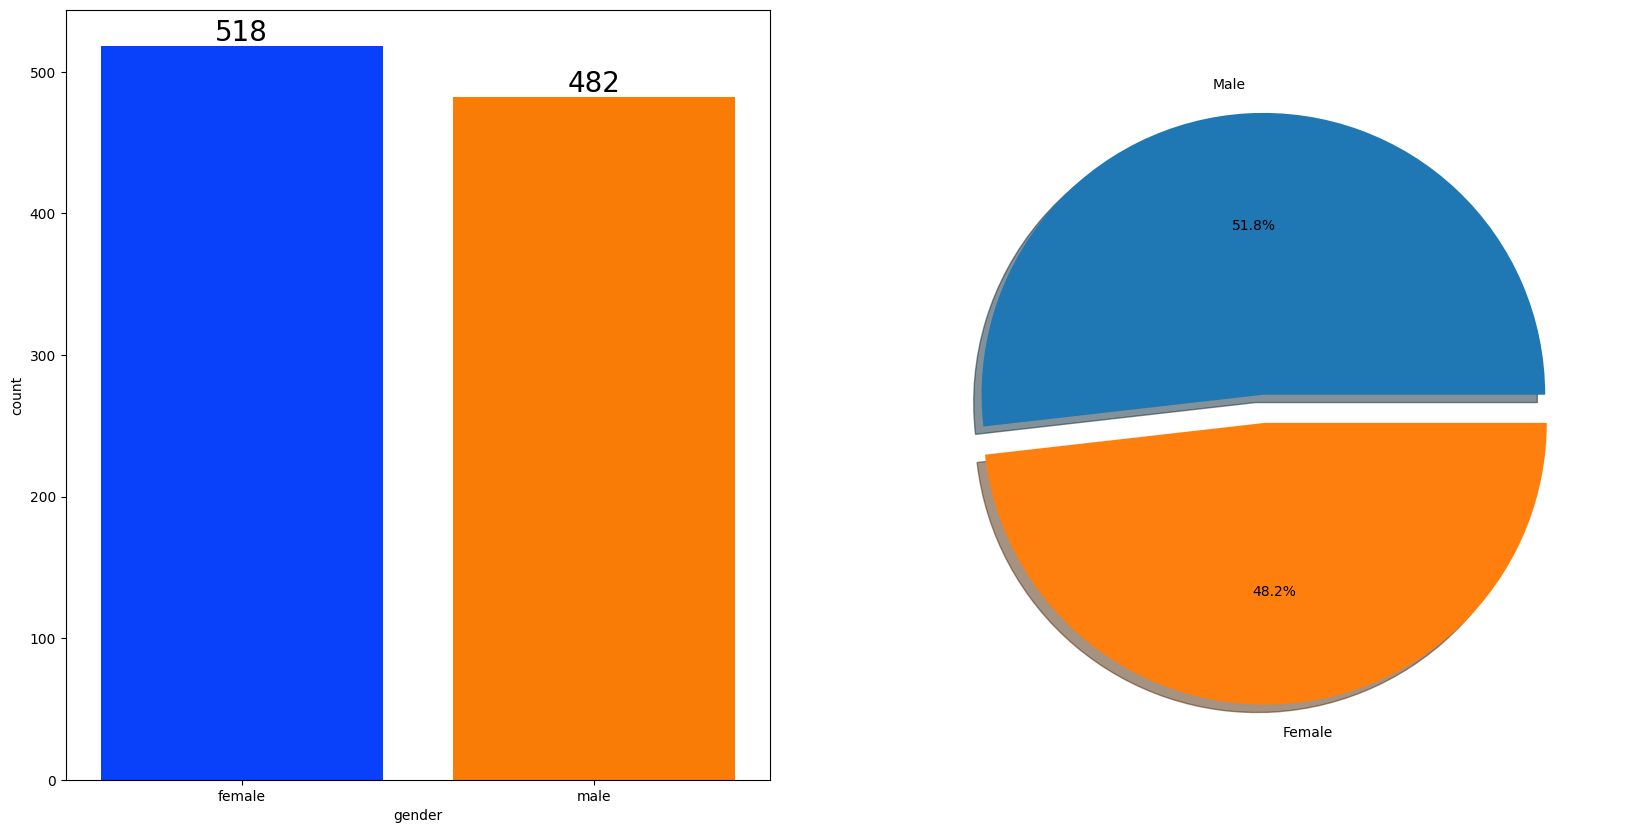

In [64]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True)
plt.show()

# Notes:
- no thinge extream
- Gender has balanced data with female students are 518 (48.2%) and male students are 482 (51.8%)

        math score  reading score  writing score  total score    average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483


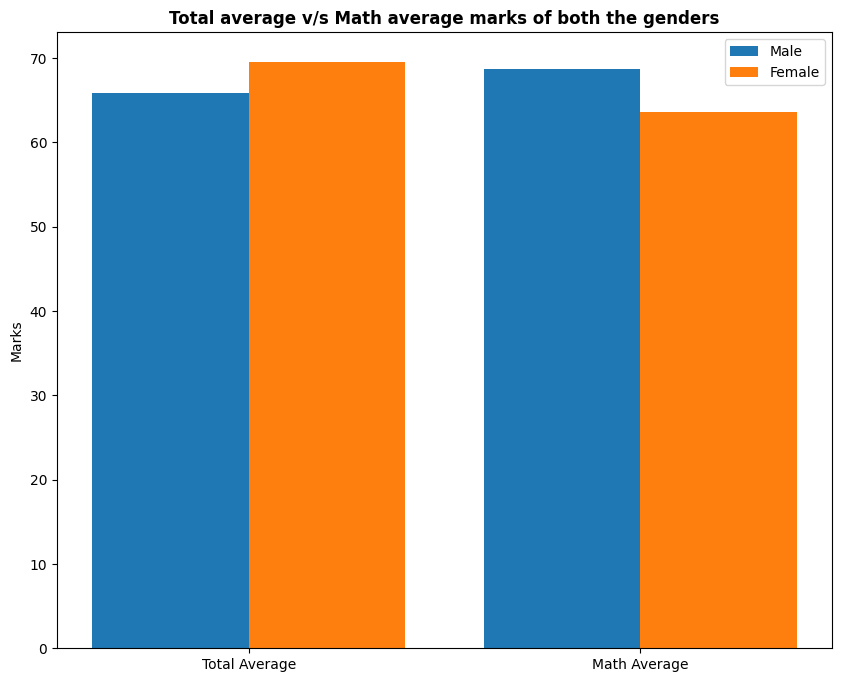

In [66]:
gender_group = df.groupby('gender').mean()
print(gender_group)
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()